# Question 1: Linear Models with Made-up Materials Data
**1.1 Loading and examing our data**

You are provided with a dataset containing fictional materials science-related data. The data is in the HW1 folder named `AutoAM_dataset.csv` The dataset includes features such as temperature, pressure, and composition, and the target variable is a property of interest (e.g., conductivity).

a) Load the dataset and explore its structure. Heads up though! I poisoned the dataset a with things like outliers, missing cells, duplicate entries, nonsense values etc. Identify problematic data. 

I suggest using both descriptive statistics as well as some plotting to visualize the data. If you are really feeling brave you could check out and use the amazing `ydata-profiling` package (https://docs.profiling.ydata.ai/latest/). 

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport  # Install ydata-profiling using pip install ydata-profiling

# Load the dataset
file_path = "AutoAM_dataset.csv"
df = pd.read_csv(file_path)

# Explore the structure of the dataset
print('here are the first few rows of the dataset:')
print(df.head())  # Display the first few rows
print('here is some info about the dataset:')
print(df.info())  # Display information about the dataset

# Check for missing values
print('here are the number of NAN values:')
print(df.isnull().sum())

# Check for duplicate entries
print('here are the number of duplicate entries:')
print(df.duplicated().sum())

# Descriptive statistics
print('here are the descriptive statistics:')
print(df.describe())


here are the first few rows of the dataset:
   Prime Delay  Print Speed  X Offset Correction  Y Offset Correction  \
0          0.0     1.000000             0.000000             0.000000   
1          2.5     3.000000             0.100000                  NaN   
2          5.0     5.000000            -0.100000            -0.100000   
3          0.0     0.999931             0.000006             0.000025   
4          0.0     5.070133             0.225151             1.000000   

      Score  
0  0.339554  
1  0.000000  
2  0.218576  
3  0.368919  
4  0.000000  
here is some info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Prime Delay          101 non-null    float64
 1   Print Speed          100 non-null    float64
 2   X Offset Correction  102 non-null    float64
 3   Y Offset Correction  100 non-null    

Summarize dataset:  88%|████████▊ | 35/40 [00:04<00:00,  7.98it/s, Missing diagram heatmap]                         c:\Users\taylo\miniconda3\envs\MatInformatics\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\taylo\miniconda3\envs\MatInformatics\lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 52.64it/s]


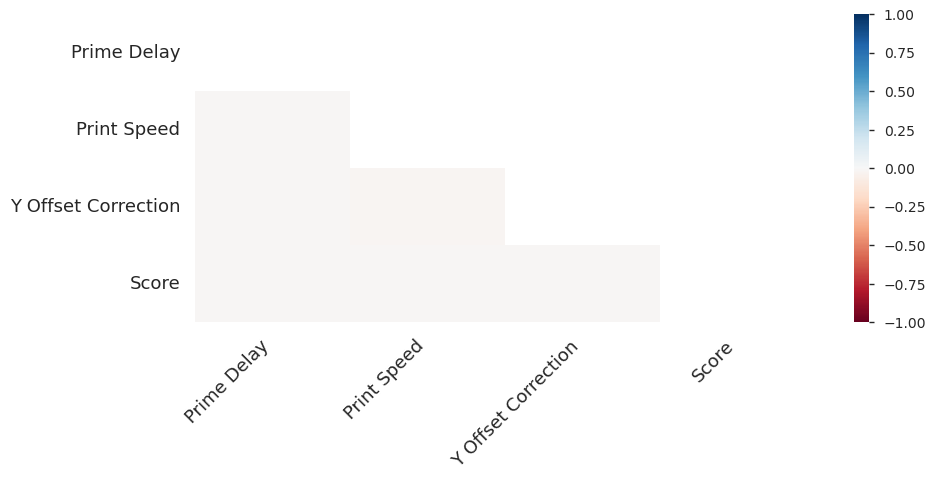

In [34]:
# Generate a profiling report using ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("dataset_profiling_report.html")


b) Deal with the identified problematic data and deal with them however you see fit. Once you have done so, plot the data. The data set has 4 features and a score. Use scatter plots where you encode information as x, y, and color. Plot histograms or violin plots of some of the features.

In [35]:
# Remove duplicates
df = df.drop_duplicates()

# Remove missing cells
df = df.dropna()

# Remove outliers
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'Score')
df = remove_outliers(df, 'Prime Delay')
df = remove_outliers(df, 'Print Speed')
df = remove_outliers(df, 'X Offset Correction')
df = remove_outliers(df, 'Y Offset Correction')
df.head()


,Prime Delay,Print Speed,X Offset Correction,Y Offset Correction,Score
0,0.00000,1.000000,0.000000,0.000000,0.339554
2,5.00000,5.000000,-0.100000,-0.100000,0.218576
3,0.00000,0.999931,0.000006,0.000025,0.368919
5,0.00000,0.477298,0.040987,0.191861,0.142527
6,0.03713,0.893927,-0.035154,0.047947,0.420117


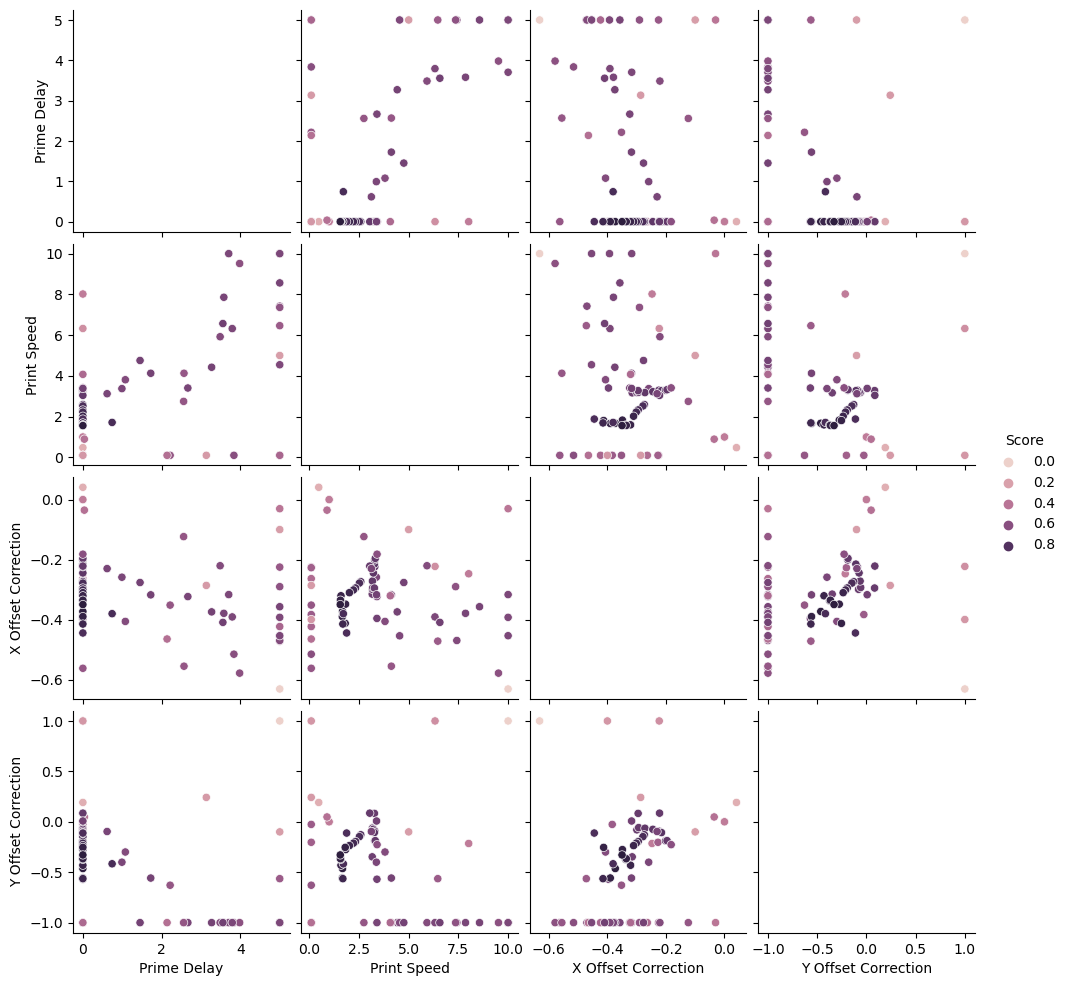

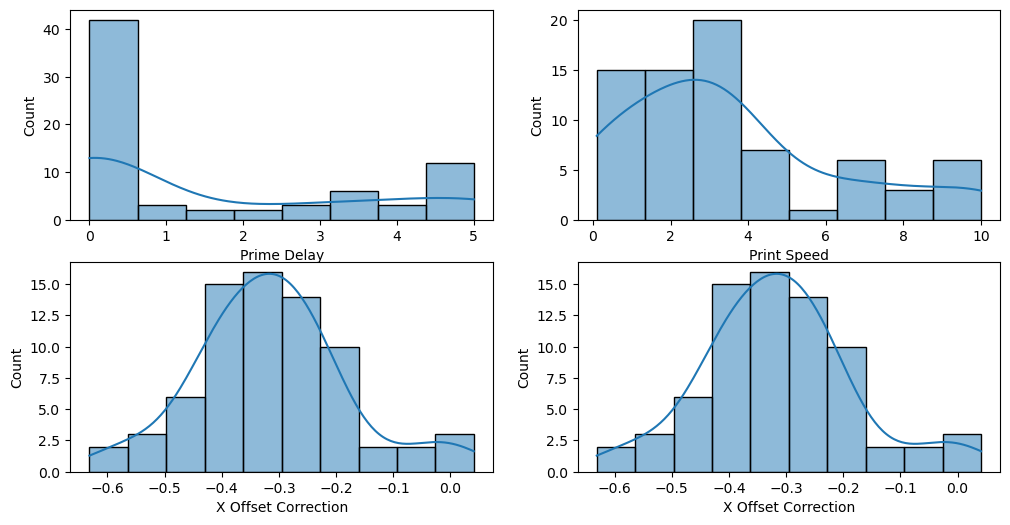

In [36]:
# Visualize the data using scatter plots
sns.pairplot(df, hue="Score")  # Use "score" as the color variable

# Plot histograms or violin plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df["Prime Delay"], kde=True)
plt.subplot(2, 2, 2)
sns.histplot(df["Print Speed"], kde=True)
plt.subplot(2, 2, 3)
sns.histplot(df["X Offset Correction"], kde=True)
plt.subplot(2, 2, 4)
sns.histplot(df["X Offset Correction"], kde=True)
plt.show()


b) Split the dataset into training and testing sets (80% training, 20% testing).



In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (58, 5)
Testing set shape: (15, 5)


**1.2 Linear Model Construction and Validation**

Build a linear regression model using the statsmodels package.

a) Train the linear model on the training set.

In [38]:
import statsmodels.api as sm

# Define the target variable and features
target = 'Score'
features = ['Prime Delay', 'Print Speed', 'X Offset Correction', 'Y Offset Correction']

# Add a constant column to the features
train_df = sm.add_constant(train_df)

# Create the model
model = sm.OLS(train_df[target], train_df[features])

# Fit the model to the training data
results = model.fit()

# Print the summary of the model
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              107.6
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                    4.68e-25
Time:                        11:37:05   Log-Likelihood:                          4.8999
No. Observations:                  58   AIC:                                     -1.800
Df Residuals:                      54   BIC:                                      6.442
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

b) Validate the model on the testing set and calculate relevant evaluation metrics.



In [39]:
# Add a constant column to the features in the testing set
test_df = sm.add_constant(test_df)

# Predict the target variable using the trained model
predictions = results.predict(test_df[features])

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_df[target], predictions)
r2 = r2_score(test_df[target], predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.08370298189312807
R-squared: -1.0888971869237936


c) Interpret the model coefficients and assess the model's performance.



**<span style="color:teal">put your discussion here</span>**
